# Search Volume vs. Traffic

* There are ***631,246 unique search queries*** with CTR less than 40% (outliers removed)


* Search Volume and Traffic have a Non-Linear Relationship with positive correlation of ***~0.4518 ***


* **98,483 keywords** with Volume above average and Traffic below average


* **86,483 keywords** with Traffic above average and Volume below average


In [31]:
options(repr.plot.width=8, repr.plot.height=7, scipen=8)

### Load Data

In [32]:
data <- read.csv('data/output.csv', header=F)

In [33]:
names(data) <- c('query', 'volume', 'traffic', 'CTR')
head(data, n=5)

query,volume,traffic,CTR
behold... the arctopus,185.38,163.1941,NA
arduino solar tracker,602.14,510.1435,NA
lil kesh,2228.70,312.6566,0.19
george p lee,586.50,370.1078,NA
funny movie quotes,9325.20,8133.0870,0.41


### exclude CTR = NULL and > .4 and get mean values for volume, traffic and CTR for each queries

In [34]:
data <- subset(data, !is.na(CTR) & CTR <= .4 & volume > 0 & traffic > 0)
data <- aggregate(.~query, data, mean)
head(data)

query,volume,traffic,CTR
',312653.98,28391.8532,0.06
';,3146.40,193.9736,0.15
'],3229.61,465.3624,0.23
'murica,3815.20,579.3456,0.23
's vs s',2591.60,2018.0358,0.35
'tis the season!,1310079.29,194385.0059,0.31


### Explicit Outlier removal

In [5]:
data <- subset(data, volume < 1e+5 & traffic < 5e+4)
head(data)

,query,volume,traffic,CTR
2,';,3146.40,193.9736,0.15
3,'],3229.61,465.3624,0.23
4,'murica,3815.20,579.3456,0.23
5,'s vs s',2591.60,2018.0358,0.35
8,- in r,2502.40,4083.2425,0.11
9,-> in c,930.58,1719.7325,0.24


### Remove outliers

In [35]:
outlierKD <- function(dt, var) {
     var_name <- eval(substitute(var),eval(dt))
     na1 <- sum(is.na(var_name))
     m1 <- mean(var_name, na.rm = T)
     par(mfrow=c(2, 2), oma=c(0,0,3,0))
     boxplot(var_name, main="With outliers")
     hist(var_name, main="With outliers", xlab=NA, ylab=NA)
     outlier <- boxplot.stats(var_name)$out
     mo <- mean(outlier)
     var_name <- ifelse(var_name %in% outlier, NA, var_name)
     boxplot(var_name, main="Without outliers")
     hist(var_name, main="Without outliers", xlab=NA, ylab=NA)
     title("Outlier Check", outer=TRUE)
     na2 <- sum(is.na(var_name))
     cat("Outliers identified:", na2 - na1, "\n")
     cat("Propotion (%) of outliers:", round((na2 - na1) / sum(!is.na(var_name))*100, 1), "\n")
     cat("Mean of the outliers:", round(mo, 2), "\n")
     m2 <- mean(var_name, na.rm = T)
     cat("Mean without removing outliers:", round(m1, 2), "\n")
     cat("Mean if we remove outliers:", round(m2, 2), "\n")
     response <- readline(prompt="Do you want to remove outliers and to replace with NA? [yes/no]: ")
     if(response == "y" | response == "yes"){
          dt[as.character(substitute(var))] <- invisible(var_name)
          assign(as.character(as.list(match.call())$dt), dt, envir = .GlobalEnv)
          cat("Outliers successfully removed", "\n")
          return(invisible(dt))
     } else{
          cat("Nothing changed", "\n")
          return(invisible(var_name))
     }
}

Do you want to remove outliers and to replace with NA? [yes/no]: yes
Outliers identified: 105513 
Propotion (%) of outliers: 15.7 
Mean of the outliers: 46827.3 
Mean without removing outliers: 8787.48 
Mean if we remove outliers: 2826 
Outliers successfully removed 


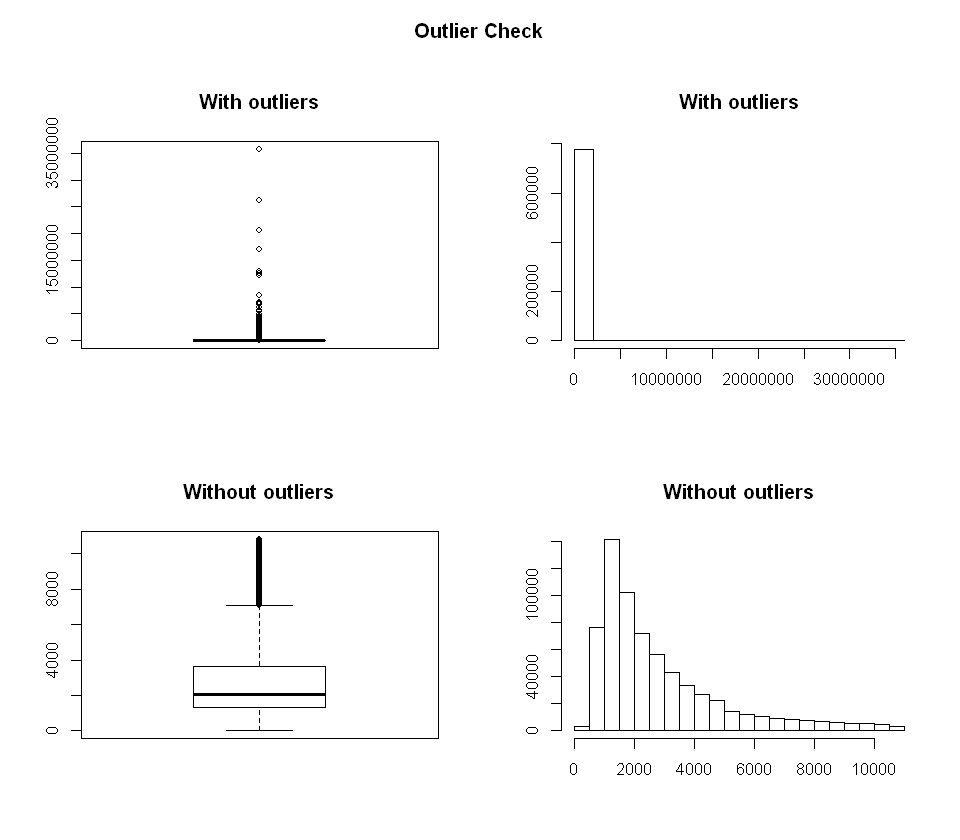

In [36]:
data = outlierKD(data, volume)

Do you want to remove outliers and to replace with NA? [yes/no]: yes
Outliers identified: 98923 
Propotion (%) of outliers: 14.6 
Mean of the outliers: 65568.91 
Mean without removing outliers: 9627.93 
Mean if we remove outliers: 1488.26 
Outliers successfully removed 


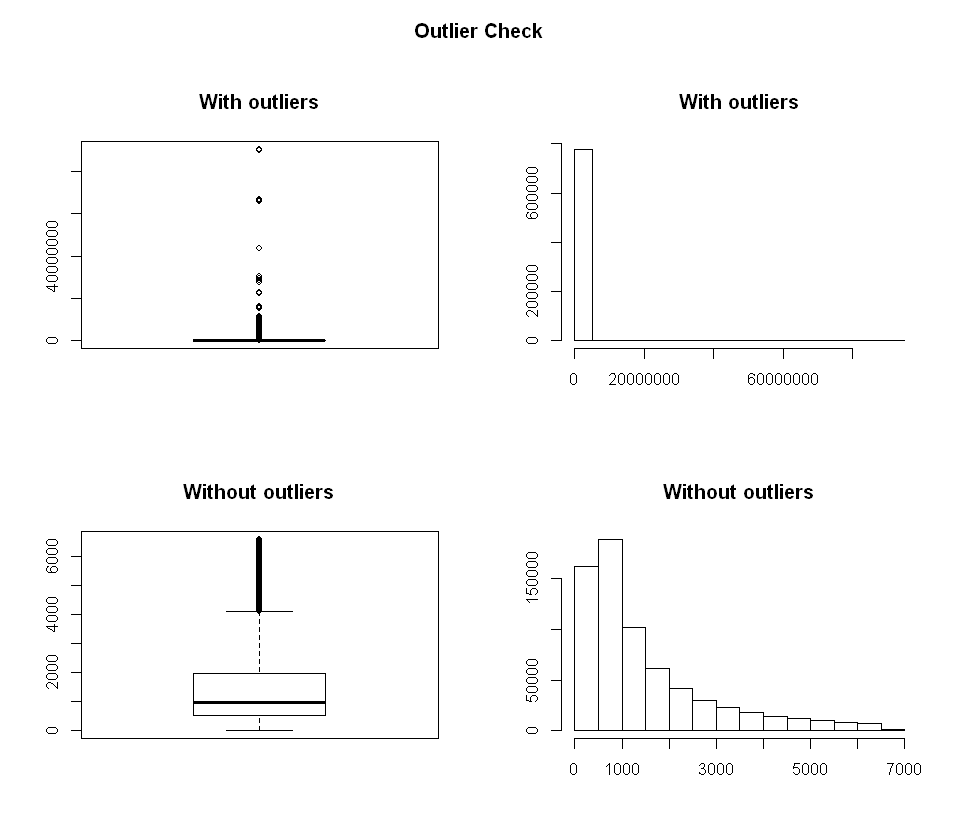

In [37]:
data = outlierKD(data, traffic)

In [45]:
data <- subset(data, !is.na(CTR) & !is.na(volume) & !is.na(traffic))
head(data)

,query,volume,traffic,CTR
2,';,3146.40,193.9736,0.15
3,'],3229.61,465.3624,0.23
4,'murica,3815.20,579.3456,0.23
5,'s vs s',2591.60,2018.0358,0.35
8,- in r,2502.40,4083.2425,0.11
9,-> in c,930.58,1719.7325,0.24


### Number of unique queries after exclusion

In [46]:
nrow(data)

[1] 631246

In [47]:
options(repr.plot.width=5, repr.plot.height=4, scipen=8)

### Plotting Volume vs Traffic

In [48]:
reg1 <- lm(volume~traffic,data=data) 
summary(reg1)


Call:
lm(formula = volume ~ traffic, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
 -6055  -1106   -483    668   8840 

Coefficients:
               Estimate  Std. Error t value Pr(>|t|)    
(Intercept) 1696.274242    3.381829   501.6   <2e-16 ***
traffic        0.738345    0.001865   395.9   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1830 on 631244 degrees of freedom
Multiple R-squared:  0.1989,	Adjusted R-squared:  0.1989 
F-statistic: 1.567e+05 on 1 and 631244 DF,  p-value: < 2.2e-16


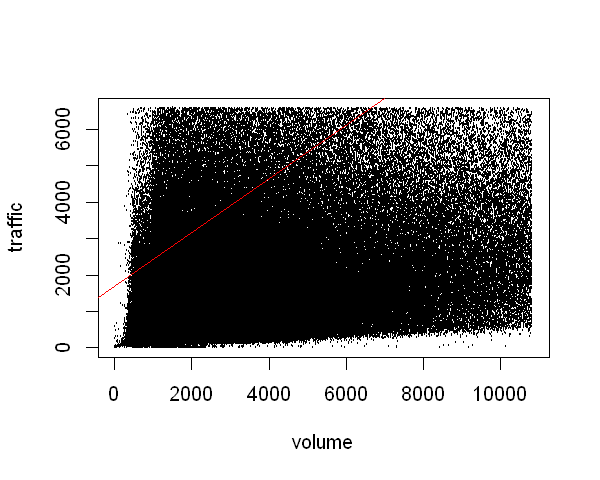

In [49]:
with(data, plot(volume, traffic, col=1, cex=0.1))
abline(reg1, col=2)

### scatter plot shows the non linear relationship between search volume and traffic

### Let's fit a non linear model and look at the correlation

In [50]:
# 1. Find the nonlinear relation between volume and traffic
fit <- nls(traffic ~ a*volume^b, data=data)
# 2. Get its equation
coef(fit)
# 3. Get its P value
summary(fit)

Warning message in nls(traffic ~ a * volume^b, data = data):
"No starting values specified for some parameters.
Initializing 'a', 'b' to '1.'.
Consider specifying 'start' or using a selfStart model"

a          b 
14.8699004  0.5767386


Formula: traffic ~ a * volume^b

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a 14.869900   0.174585   85.17   <2e-16 ***
b  0.576739   0.001426  404.52   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1102 on 631244 degrees of freedom

Number of iterations to convergence: 11 
Achieved convergence tolerance: 0.0000005517


### Correlation:

In [52]:
# 4. get correlation coefficient (nonlinear)
cor(predict(fit), data$traffic)

[1] 0.4517973

### Search Volume vs. Traffic

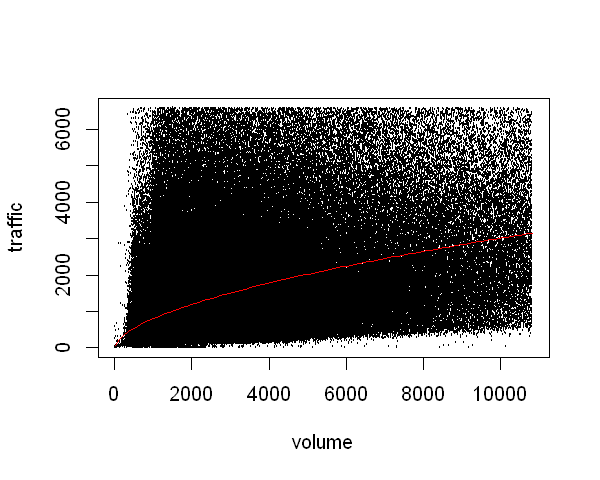

In [53]:
# 5. Plot this curve
newdat <- data.frame(volume=seq(min(data$volume), max(data$volume),,100))
newdat$traffic <- predict(fit, newdat)
plot(traffic ~ volume, data, col=1, cex=0.1)
lines(traffic ~ volume, newdat, col=2)

### Just another approach ...

In [54]:
## GAM

# 1. Find the nonlinear relation between volume and traffic
library(mgcv)
fit <- gam(traffic ~ s(volume), data=data)
# 2. Get its equation
coef(fit)

# 3. Get its P value
summary(fit)

(Intercept) s(volume).1 s(volume).2 s(volume).3 s(volume).4 s(volume).5 
 1327.81869    79.41976   183.04102   245.60613   152.64152   -11.02898 
s(volume).6 s(volume).7 s(volume).8 s(volume).9 
 -121.94428  -163.89859   399.27397   674.88904


Family: gaussian 
Link function: identity 

Formula:
traffic ~ s(volume)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1327.819      1.385   958.4   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
            edf Ref.df     F p-value    
s(volume) 8.918  8.998 18152  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.206   Deviance explained = 20.6%
GCV = 1.2117e+06  Scale est. = 1.2117e+06  n = 631246

### Correlation is close to the previous approach

In [55]:
# 4. get correlation coefficient (nonlinear)
cor(predict(fit), data$traffic)

[1] 0.4533875

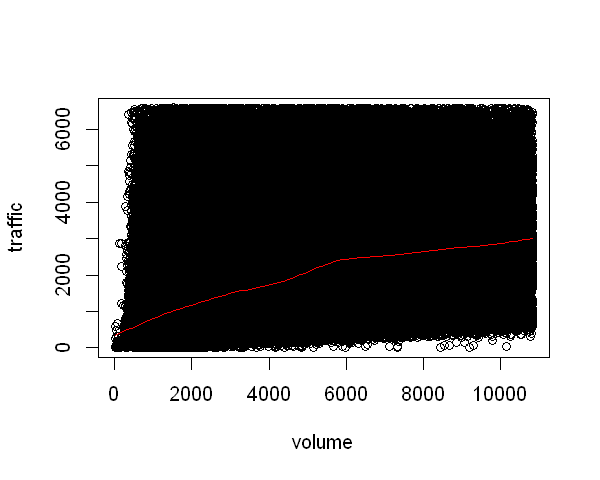

In [56]:
# 5. Plot this curve
newdat <- data.frame(volume=seq(min(data$volume), max(data$volume),,100))
newdat$traffic <- predict(fit, newdat)
plot(traffic ~ volume, data)
lines(traffic ~ volume, newdat, col=2)

In [57]:
nrow(subset(data, volume > mean(data$volume) & traffic < mean(data$traffic)))

[1] 98483

In [58]:
nrow(subset(data, volume < mean(data$volume) & traffic > mean(data$traffic)))

[1] 86483

### 100 keywords with more Volume but less Traffic

In [83]:
topVol_lessTraf <- subset(data, volume > quantile(data$volume, .908) & traffic < quantile(data$traffic, 0.092))
nrow(topVol_lessTraf)

[1] 104

In [84]:
topVol_lessTraf  <- topVol_lessTraf[order(topVol_lessTraf$volume, decreasing=T),]
topVol_lessTraf <- head(topVol_lessTraf, n=100)
head(topVol_lessTraf)

,query,volume,traffic,CTR
231361,erin everly,10142.54,38.83302,0.18
18069,ace combat infinity,9782.82,204.74497,0.26
344137,iglesia,9415.28,290.60518,0.15
505673,oh shit,9282.34,66.86009,0.22
700551,train crash,9196.32,23.88031,0.06
603256,scarring,9071.20,147.00560,0.38


In [85]:
topVol_lessTraf$query

[1] erin everly                         ace combat infinity                
  [3] iglesia                             oh shit                            
  [5] train crash                         scarring                           
  [7] theresa                             paul george shoes                  
  [9] new directions                      shopping king louie                
 [11] mega dragonite                      hambre                             
 [13] sophie turner height                mapache                            
 [15] chelsea tallarico                   ngl meaning                        
 [17] compared                            msk                                
 [19] anecdotal definition                hilarity                           
 [21] remark                              jolly                              
 [23] syncopate                           brow                               
 [25] leslie jones hacked                 hazel moder                        
 [27] winnow                              spiderman symbol                   
 [29] rabble                              jeez                               
 [31] filtrate                            otcmkts:fmcc                       
 [33] mann                                massa                              
 [35] sooth                               georgia abbreviation               
 [37] improper                            you mean the world to me           
 [39] festive                             sued                               
 [41] maquillaje                          backflip                           
 [43] chris evans height                  legislative branch definition      
 [45] fright                              equal justice initiative           
 [47] tommy gunn                          nasdaq:bbep                        
 [49] pouty                               farrow                             
 [51] pent                                halo logo                          
 [53] josie                               kentucky abbreviation              
 [55] lil ron ron                         verticle                           
 [57] paunch                              tomate                             
 [59] james franco net worth              puffy                              
 [61] gallantry                           seth rogen net worth               
 [63] bac stands for                      jennette mccurdy puberty done right
 [65] gent                                shy girl                           
 [67] mermaid videos                      army wives cast                    
 [69] miles brockman richie               ely                                
 [71] marketplace.gov                     odium                              
 [73] eme                                 nyse:nvo                           
 [75] bickering                           predatory                          
 [77] sealed                              homebound                          
 [79] zanahoria                           time magazine subscription         
 [81] settled                             intemperate                        
 [83] venial                              desparate                          
 [85] itt meaning                         lil yachty lil boat                
 [87] spiral perm                         fts                                
 [89] unpretentious                       gustation                          
 [91] nyse:aem                            heads                              
 [93] marginally                          matt ryan wife                     
 [95] ery                                 hobbyist                           
 [97] proud of you                        advised                            
 [99] bene                                aby                                
1995207 Levels:  ' '-' '/ '; '[ '\\ '] ... zzzzzzz

### 100 Keywords with more Traffic but less Volume

In [69]:
topTraf_lessVol <- subset(data, traffic > quantile(data$traffic, 0.958) & volume < quantile(data$volume, .042))
nrow(topTraf_lessVol)

[1] 102

In [70]:
topTraf_lessVol <- topTraf_lessVol[order(topTraf_lessVol$traffic, decreasing=T),]
topTraf_lessVol <- head(topTraf_lessVol, n=100)
head(topTraf_lessVol)

,query,volume,traffic,CTR
294183,grocery budget for 1,519.53,6539.296,0.25
326436,how to claim powerball,633.42,6538.331,0.35
366046,jeep patriot reliability,616.26,6518.999,0.15
256401,flowers that bloom all summer,513.75,6502.415,0.16
315444,hoax websites,489.65,6464.636,0.32
536204,pieology promo code,523.94,6454.256,0.26


In [71]:
topTraf_lessVol$query

[1] grocery budget for 1                              
  [2] how to claim powerball                            
  [3] jeep patriot reliability                          
  [4] flowers that bloom all summer                     
  [5] hoax websites                                     
  [6] pieology promo code                               
  [7] las vegas this weekend                            
  [8] how to access blocked websites                    
  [9] planet fitness 30 minute workout                  
 [10] crock pot black eyed peas                         
 [11] us army webmail                                   
 [12] stardew valley cheat codes                        
 [13] deadpool movie putlockers                         
 [14] steel ball run color                              
 [15] game of thrones weapons                           
 [16] when does dragon ball super take place            
 [17] roblox passwords                                  
 [18] emailing resume                                   
 [19] delta lost baggage                                
 [20] how to ship frozen food                           
 [21] jacques torres chocolate chip cookies             
 [22] signs wife is cheating                            
 [23] defeat a powerful fallen with drang               
 [24] civil war reenactment gear                        
 [25] mac other storage                                 
 [26] fist fight full movie 123movies                   
 [27] idiocracy free online                             
 [28] baby vision                                       
 [29] get out hd stream                                 
 [30] number of abortions                               
 [31] ubuntu samba                                      
 [32] sheer babydoll                                    
 [33] dcth news                                         
 [34] metal panel texture                               
 [35] best etf to buy                                   
 [36] youtube an error occurred please try again later  
 [37] flip flappers wiki                                
 [38] floating point representation                     
 [39] how to watch live tv on roku                      
 [40] photoshop sharpen image                           
 [41] ar 15 slide fire                                  
 [42] fifty shades darker stream                        
 [43] best ass gifs                                     
 [44] powerball anonymous                               
 [45] nude dancing girls                                
 [46] pokemon x and y emulator for pc                   
 [47] pulled bullets                                    
 [48] week 5 te rankings                                
 [49] fare calendar                                     
 [50] dia de todos los santos                           
 [51] iphone emojis for android                         
 [52] colleges and universities near me                 
 [53] best iphone apps 2015                             
 [54] sexyvideos                                        
 [55] ar 15 22 conversion kit                           
 [56] ebay buyer not paying                             
 [57] grand canyon helicopter tour from las vegas       
 [58] best pc for video editing                         
 [59] jack reacher never go back watch online putlockers
 [60] best va loan lenders                              
 [61] bard instruments 5e                               
 [62] pan's labyrinth full movie english subtitles      
 [63] trump protest sign ideas                          
 [64] personal mission statement generator              
 [65] rick and morty s1e3                               
 [66] htc one m8 wont turn on                           
 [67] jetblue enrollment code                           
 [68] e60 m5 for sale                                   
 [69] ffxiv flying                                      
 [70] difference between blazer and suit                
 [71] cannab